<a href="https://colab.research.google.com/github/jgesc-05/proy_inteligencia_artificial/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Predicción Calidad del Aire*

**Por: Juan Guillermo Escobar Baez**

#1. Importación del dataset desde Kaggle

* Desde Kaggle (plataforma de datos abiertos), se importa un dataset, que contiene parámetros para determinar la calidad del aire (PM2.5, PM10, etcétera).

* Se utiliza la librería de Kagglehub

* Para crear el dataframe Pandas, se utiliza Pandas (pd) para tratar los datos.

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("pranavraizada/pune-air-quality-index-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/2024_hourly_data.csv")
df.head()

100%|██████████| 104k/104k [00:00<00:00, 25.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pranavraizada/pune-air-quality-index-dataset/versions/2


,Date,Time,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,2023-12-31,01:00:00,59.0,6.0,34.0,0.0,191.0,211.0,3.0
1,2023-12-31,02:00:00,62.0,6.0,33.0,1.0,185.0,225.0,4.0
2,2023-12-31,03:00:00,50.0,6.0,30.0,0.0,182.0,240.0,3.0
3,2023-12-31,04:00:00,52.0,5.0,27.0,0.0,176.0,247.0,3.0
4,2023-12-31,05:00:00,46.0,4.0,23.0,NaN,176.0,249.0,2.0


In [1]:
#Verificación de la forma del dataframe (filas por columnas)
df.shape

NameError: name 'df' is not defined

#2. Eliminación de características innecesarias

* Se eliminan las columnas con el método drop() de Pandas.

* Por conveniencia estadística, se elimina la fecha, dado que no es relevante en las predicciones del modelo; además, se tomarán en cuenta solo la hora, la concentración de AQI (índice de calidad del aire) del PM10 y PM2.5 (particulado por millón).

* Se sobreescribe el dataframe.

In [ ]:
df = df.drop(columns=['Date', 'CO', 'NH3', 'NO2', 'OZONE', 'SO2'])
df.head()

,Time,PM10,PM2.5
0,01:00:00,191.0,211.0
1,02:00:00,185.0,225.0
2,03:00:00,182.0,240.0
3,04:00:00,176.0,247.0
4,05:00:00,176.0,249.0


#3. Cálculo de una nueva característica (feature)

* Como el objetivo del modelo (por lo menos, temporalmente) es predecir una característica categórica ("bueno", "moderado", etcétera), es necesaria la creación de un feature categórico.

* Por medio de una función llamada "calculate_aqi", que recibe como parámetro el índice de aqi del pm2.5, se retorna la calidad del aire y se guarda, por medio del método apply de Pandas, la categoría según el AQI PM2.5.

In [ ]:
def calculate_aqi(pm25):
    if pm25 <= 50:
        return "Bueno"
    elif pm25 <= 100:
        return "Moderado"
    elif pm25 <= 150:
        return "No sano para grupos sensitivos"
    elif pm25 <= 200:
        return "No sano en general"
    elif pm25 <= 300:
        return "Muy poco sano"
    else:
        return "Peligroso"

# Aplica la función a la columna 'PM2.5' y crea una nueva columna 'AQI_Category'
df['AQI_Category'] = df['PM2.5'].apply(calculate_aqi)

# Imprime el DataFrame con la nueva columna
df

,Time,PM10,PM2.5,AQI_Category
0,01:00:00,191.0,211.0,Muy poco sano
1,02:00:00,185.0,225.0,Muy poco sano
2,03:00:00,182.0,240.0,Muy poco sano
3,04:00:00,176.0,247.0,Muy poco sano
4,05:00:00,176.0,249.0,Muy poco sano
...,...,...,...,...
8005,20:00:00,48.0,49.0,Bueno
8006,21:00:00,51.0,43.0,Bueno
8007,22:00:00,63.0,41.0,Bueno
8008,23:00:00,70.0,42.0,Bueno


#4. Tratamiento de outliers (valores atípicos) y nulos

* Por medio de medidas de tendencia central, como la mediana, y por conveniencia estadística, se eliminan los nulos de las características.

In [ ]:
#Aquí se verifican los nulos para saber en cuáles características (features) se deben tratar los nulos.
df.isnull().sum()

,0
Time,0
PM10,262
PM2.5,314
AQI_Category,0


In [ ]:
df.isnull().sum()

,0
Time,0
PM10,262
PM2.5,314
AQI_Category,0


In [ ]:
df.shape

(8010, 4)

<ipython-input-9-ec85c24537d9>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


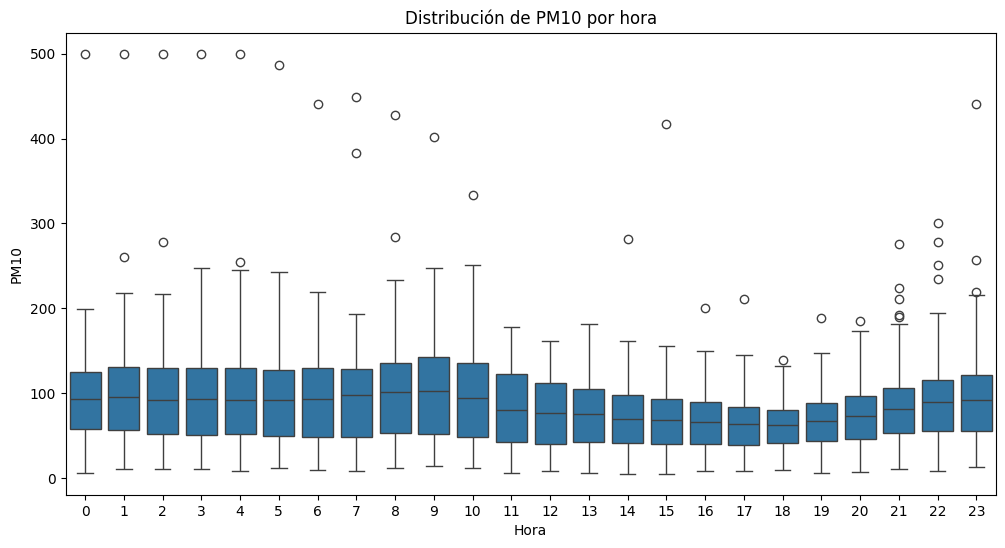

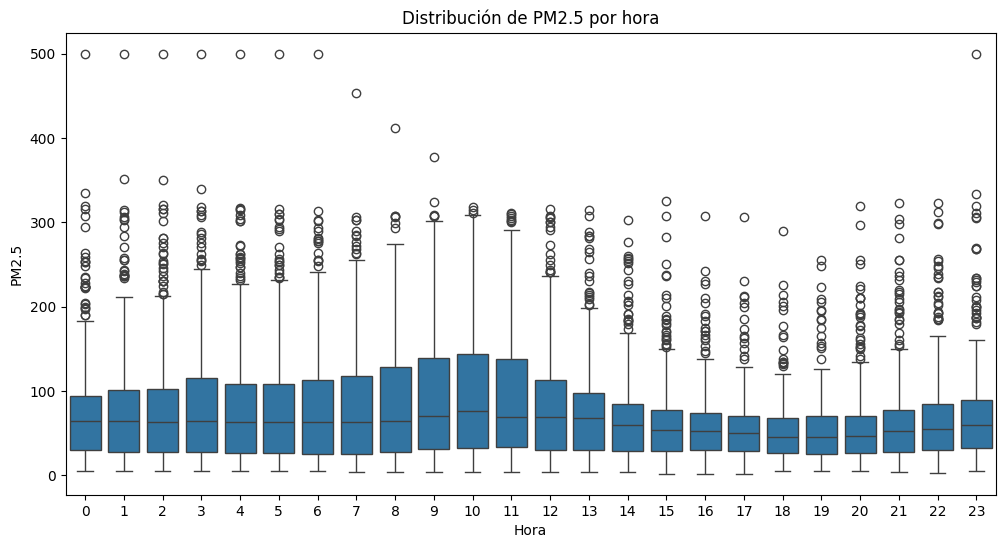

In [ ]:
# prompt: Muéstrame la distribución de los datos pm10 y pm2.5 respecto a la hora con boxplot

# Convertir la columna 'Hour' a tipo datetime
df['Time'] = pd.to_datetime(df['Time'])

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Time'].dt.hour, y=df['PM10'], data=df)
plt.title('Distribución de PM10 por hora')
plt.xlabel('Hora')
plt.ylabel('PM10')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Time'].dt.hour, y=df['PM2.5'], data=df)
plt.title('Distribución de PM2.5 por hora')
plt.xlabel('Hora')
plt.ylabel('PM2.5')
plt.show()


In [ ]:
#Descripción de los datos (se verifica especialmente la desviación estándar, std)
df.describe()

,Time,PM10,PM2.5
count,8010,7748.000000,7696.000000
mean,2025-03-22 11:28:55.730337280,84.449923,75.946985
min,2025-03-22 00:00:00,5.000000,2.000000
25%,2025-03-22 05:00:00,47.000000,28.000000
50%,2025-03-22 11:00:00,80.000000,57.000000
75%,2025-03-22 18:00:00,115.000000,94.000000
max,2025-03-22 23:00:00,500.000000,500.000000
std,NaN,46.106604,66.487520


In [ ]:
#Por medio de una consulta se verifica que, efectivamente, coincidan las categorías del aqi general (AQI_Category) con su valor de AQI PM2.5
df[df['AQI_Category'] == "No sano para grupos sensitivos"]

,Time,PM10,PM2.5,AQI_Category
13,2025-03-22 14:00:00,109.0,143.0,No sano para grupos sensitivos
22,2025-03-22 23:00:00,143.0,129.0,No sano para grupos sensitivos
38,2025-03-22 15:00:00,102.0,150.0,No sano para grupos sensitivos
46,2025-03-22 23:00:00,141.0,105.0,No sano para grupos sensitivos
47,2025-03-22 00:00:00,155.0,133.0,No sano para grupos sensitivos
...,...,...,...,...
7876,2025-03-22 06:00:00,151.0,140.0,No sano para grupos sensitivos
7900,2025-03-22 06:00:00,148.0,148.0,No sano para grupos sensitivos
7901,2025-03-22 07:00:00,145.0,148.0,No sano para grupos sensitivos
7902,2025-03-22 08:00:00,150.0,149.0,No sano para grupos sensitivos


#5. Codificación de características numéricas

* Por medio de métodos de Pandas como map() (un diccionario Python con las clasificaciones numéricas de cada categoría AQI) se crea una nueva columna (feature) llamada AQI_Category_Encoded.

* Necesario porque algunos modelos no entrenan con datos categóricos, sino numéricos.

In [ ]:
aqi_mapping = {
    "Bueno": 0,
    "Moderado": 1,
    "No sano para grupos sensitivos": 2,
    "No sano en general" : 3,
    "Muy poco sano": 4,
    "Peligroso": 5

    }

#Almacenamiento de la categoría en el df
df['AQI_Category_Encoded'] = df['AQI_Category'].map(aqi_mapping)

In [ ]:
from joblib import dump, load


# Guarda el mapeo AQI en un archivo joblib, por medio del método dump()
dump(aqi_mapping, 'aqi_mapping.joblib')


['aqi_mapping.joblib']

In [ ]:
df

,Time,PM10,PM2.5,AQI_Category,AQI_Category_Encoded
0,2025-03-22 01:00:00,191.0,211.0,Muy poco sano,4
1,2025-03-22 02:00:00,185.0,225.0,Muy poco sano,4
2,2025-03-22 03:00:00,182.0,240.0,Muy poco sano,4
3,2025-03-22 04:00:00,176.0,247.0,Muy poco sano,4
4,2025-03-22 05:00:00,176.0,249.0,Muy poco sano,4
...,...,...,...,...,...
8005,2025-03-22 20:00:00,48.0,49.0,Bueno,0
8006,2025-03-22 21:00:00,51.0,43.0,Bueno,0
8007,2025-03-22 22:00:00,63.0,41.0,Bueno,0
8008,2025-03-22 23:00:00,70.0,42.0,Bueno,0


*También se codifica la hora, en formato de 0 a 23, por medio del LabelEncoder de Scikit-Learn*

* Almacenamiento del encoder (codificador) en un archivo joblib, por medio del método dump()

In [ ]:

# Eliminar la columna 'AQI_Category'
df = df.drop(columns=['AQI_Category'])

# Renombrar la columna 'AQI_Category_Encoded' a 'AQI_Category'
df = df.rename(columns={'AQI_Category_Encoded': 'AQI_Category'})

# Codificar la hora
from sklearn.preprocessing import LabelEncoder

encoded_hour = LabelEncoder()
df['Time'] = encoded_hour.fit_transform(df['Time'])

# Guardar el codificador de horas
dump(encoded_hour, 'encoded_hour.joblib')
df


,Time,PM10,PM2.5,AQI_Category
0,1,191.0,211.0,4
1,2,185.0,225.0,4
2,3,182.0,240.0,4
3,4,176.0,247.0,4
4,5,176.0,249.0,4
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


* Se observa la distribución, para conocer qué ajustes se deben hacer antes de dividir los datos en prueba y entrenamiento.

* Se utilizan las librerías de matplotlib, seaborn y pandas para conocer cómo se encuentra el conjunto de datos.

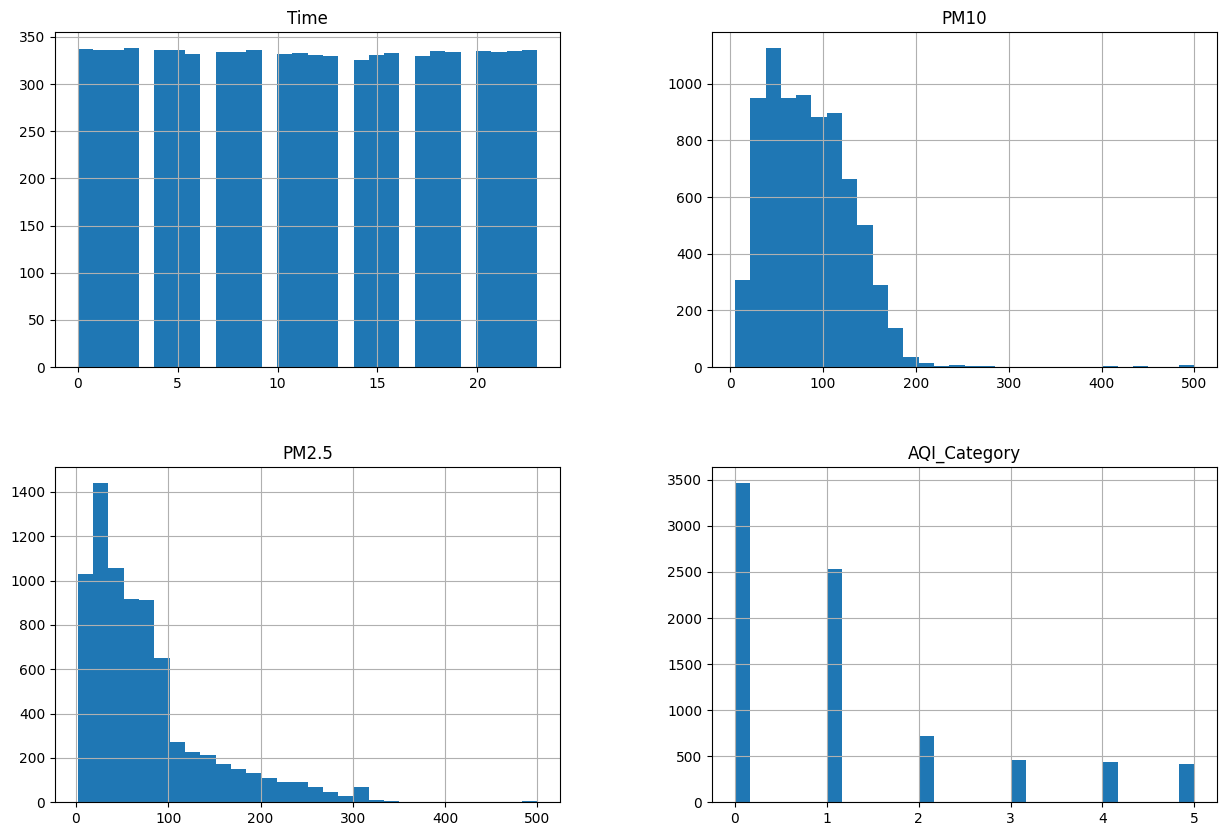

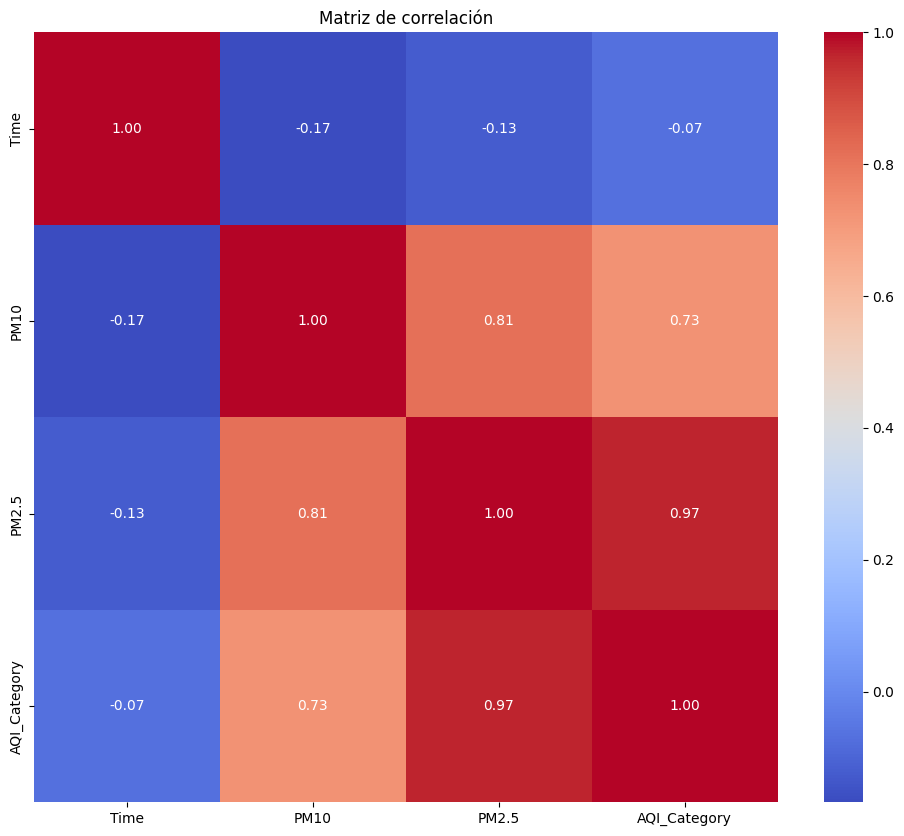

AQI_Category
0    3460
1    2528
2     715
3     457
4     440
5     410
Name: count, dtype: int64


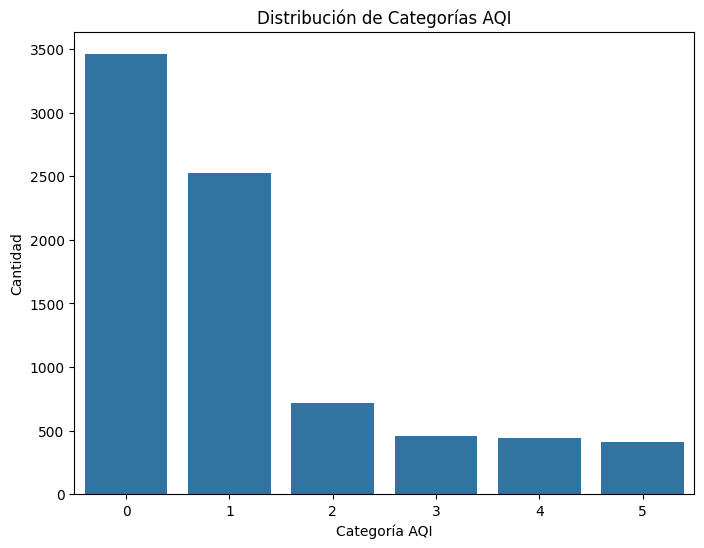

In [ ]:
# Mostrar la distribución de las variables numéricas
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Mostrar la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Contar la cantidad de datos en cada categoría AQI
aqi_counts = df['AQI_Category'].value_counts()
print(aqi_counts)

# Puedes usar un gráfico de barras para visualizar la distribución de las categorías AQI
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Category', data=df)
plt.title('Distribución de Categorías AQI')
plt.xlabel('Categoría AQI')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
df[df['AQI_Category'] == 5]

,Time,PM10,PM2.5,AQI_Category
32,9,171.0,302.0,5
33,10,172.0,301.0,5
34,11,148.0,302.0,5
59,12,NaN,NaN,5
60,13,NaN,NaN,5
...,...,...,...,...
7886,16,140.0,307.0,5
7887,17,137.0,306.0,5
8001,16,NaN,NaN,5
8002,17,NaN,NaN,5


In [ ]:
#Aquí se procedió a calcular nuevamente el valor del AQI PM2.5, dado que se presentaron algunos errores
def calculate_aqi(pm25):
    if pm25 <= 50:
        return 0  # Bueno
    elif pm25 <= 100:
        return 1  # Moderado
    elif pm25 <= 150:
        return 2  # No sano para grupos sensitivos
    elif pm25 <= 200:
        return 3  # No sano en general
    elif pm25 <= 300:
        return 4  # Muy poco sano
    else:
        return 5  # Peligroso

# Aplica la función a la columna 'PM2.5' y crea una nueva columna 'AQI_Category'
df['AQI_Category'] = df['PM2.5'].apply(calculate_aqi)
#Guardar el codificador de aqi_coder hecho aquí con esta funcion

from joblib import dump, load


# Guarda el mapeo AQI en un archivo
#Almacenamiento, nuevamente, de un archivo joblib con el codificador de la categoría.
dump(aqi_mapping, 'aqi_mapping_1.joblib')


['aqi_mapping_1.joblib']

In [ ]:
df

,Time,PM10,PM2.5,AQI_Category
0,1,191.0,211.0,4
1,2,185.0,225.0,4
2,3,182.0,240.0,4
3,4,176.0,247.0,4
4,5,176.0,249.0,4
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


In [ ]:
df[df['AQI_Category'] == 0]

,Time,PM10,PM2.5,AQI_Category
174,17,60.0,48.0,0
175,18,57.0,41.0,0
300,20,63.0,46.0,0
301,21,81.0,49.0,0
323,19,60.0,47.0,0
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


In [ ]:
df[df['PM2.5'] == 57]

,Time,PM10,PM2.5,AQI_Category
375,23,86.0,57.0,1
453,18,79.0,57.0,1
455,20,87.0,57.0,1
497,14,73.0,57.0,1
905,22,103.0,57.0,1
1101,2,81.0,57.0,1
1126,3,72.0,57.0,1
1131,8,113.0,57.0,1
1313,22,106.0,57.0,1
1353,14,57.0,57.0,1


In [ ]:
df

,Time,PM10,PM2.5,AQI_Category
0,1,191.0,211.0,4
1,2,185.0,225.0,4
2,3,182.0,240.0,4
3,4,176.0,247.0,4
4,5,176.0,249.0,4
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


In [ ]:
df

,Time,PM10,PM2.5,AQI_Category
0,1,191.0,211.0,4
1,2,185.0,225.0,4
2,3,182.0,240.0,4
3,4,176.0,247.0,4
4,5,176.0,249.0,4
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


* Nuevamente, se observan los datos (luego de la corrección), para comprobar si ya se encuentran en estado óptimo.

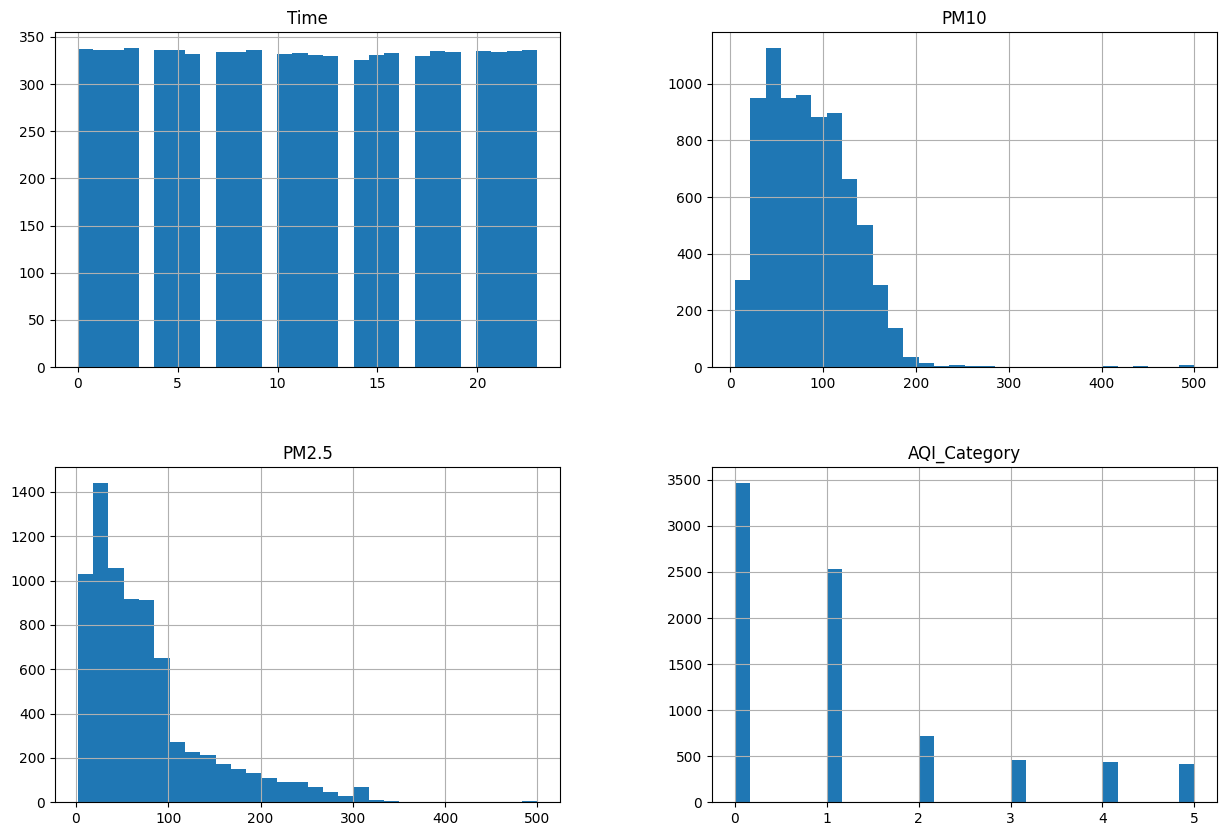

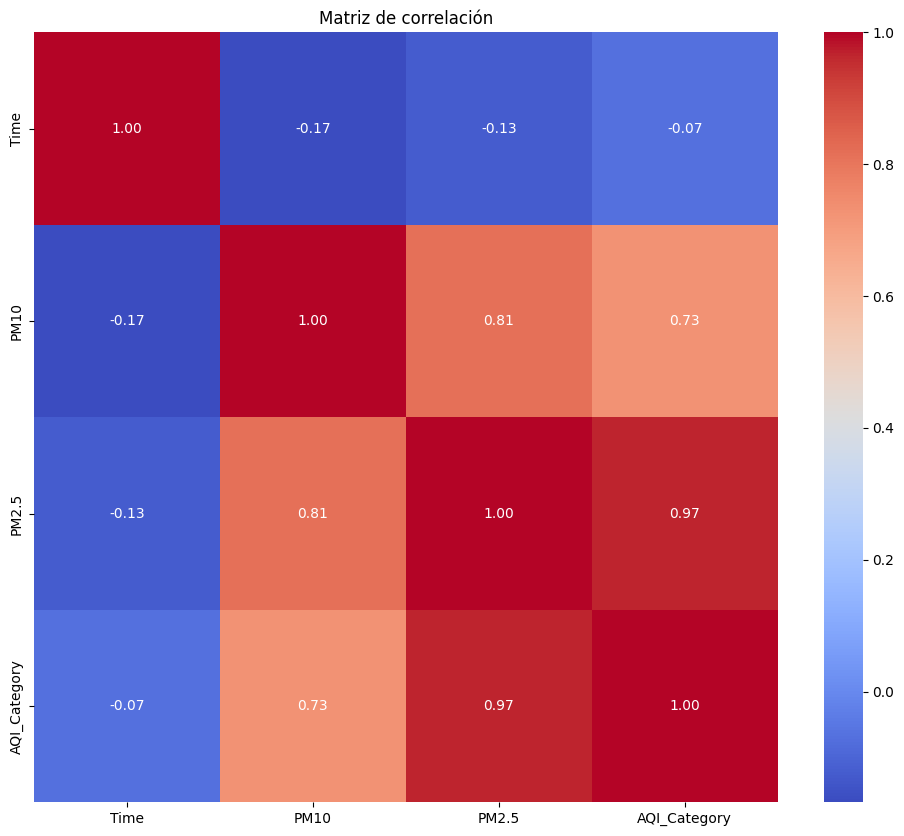

AQI_Category
0    3460
1    2528
2     715
3     457
4     440
5     410
Name: count, dtype: int64


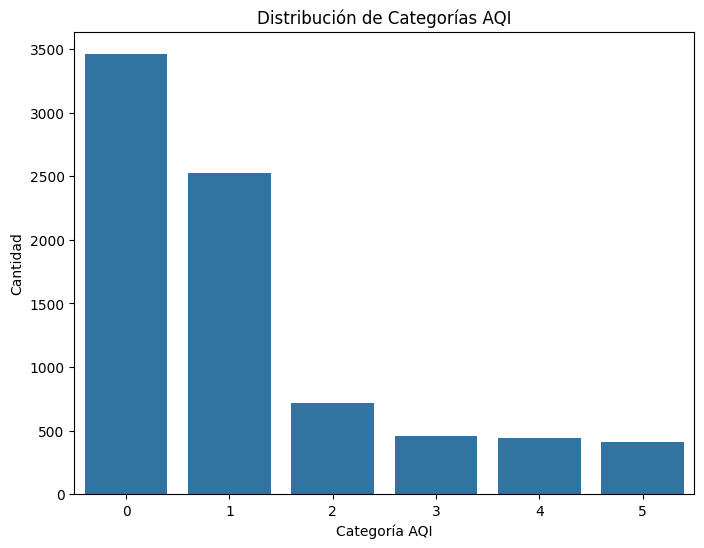

In [ ]:
# Mostrar la distribución de las variables numéricas
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Mostrar la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Contar la cantidad de datos en cada categoría AQI
aqi_counts = df['AQI_Category'].value_counts()
print(aqi_counts)

# Puedes usar un gráfico de barras para visualizar la distribución de las categorías AQI
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Category', data=df)
plt.title('Distribución de Categorías AQI')
plt.xlabel('Categoría AQI')
plt.ylabel('Cantidad')
plt.show()


In [ ]:
df.isnull().sum()

,0
Time,0
PM10,262
PM2.5,314
AQI_Category,0


* Como se recordó que aún existían nulos en el dataframe, se procedieron a llenar con la mediana (por conveniencia estadística) los existentes en el PM10 y el PM2.5 (valores de AQI).

* Cabe destacar: al tratarse de valores de AQI, incluso en el particulado, los valores muy grandes (outliers) tienen poca importancia; es conveniente estadísticamente dejarlos, debido a que, naturalmente, puede haber un alto nivel de contaminación.

In [ ]:
# Replace NaN values in 'PM2.5' and 'PM10' with the median of each column
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)


<ipython-input-26-5f768b19cdb8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
<ipython-input-26-5f768b19cdb8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
#Verificación de qué nulos hay en el dataframe (0)
df.isna().sum()

,0
Time,0
PM10,0
PM2.5,0
AQI_Category,0


In [ ]:
#Aquí, se verifica nuevamente si ahora está en concordancia con los valores de pm2.5 reales del dataframe, en cada registro.
df[df['AQI_Category'] == 5]

,Time,PM10,PM2.5,AQI_Category
32,9,171.0,302.0,5
33,10,172.0,301.0,5
34,11,148.0,302.0,5
59,12,80.0,57.0,5
60,13,80.0,57.0,5
...,...,...,...,...
7886,16,140.0,307.0,5
7887,17,137.0,306.0,5
8001,16,80.0,57.0,5
8002,17,80.0,57.0,5


*Nuevamente, se tuvo que calcular, debido a algunos problemas en la clasificación, una recategorización*

In [ ]:
def calculate_aqi(pm25):
    if pm25 <= 50:
        return 0  # Bueno
    elif pm25 <= 100:
        return 1  # Moderado
    elif pm25 <= 150:
        return 2  # No sano para grupos sensitivos
    elif pm25 <= 200:
        return 3  # No sano en general
    elif pm25 <= 300:
        return 4  # Muy poco sano
    else:
        return 5  # Peligroso

# Aplica la función a la columna 'PM2.5' y sobreescribe la columna 'AQI_Category'
df['AQI_Category'] = df['PM2.5'].apply(calculate_aqi)

# Verificar que los valores con PM2.5 de 57 ahora tienen la clasificación correcta
df[df['PM2.5'] == 57]


,Time,PM10,PM2.5,AQI_Category
59,12,80.0,57.0,1
60,13,80.0,57.0,1
242,13,80.0,57.0,1
243,14,80.0,57.0,1
244,15,80.0,57.0,1
...,...,...,...,...
7830,8,80.0,57.0,1
7831,9,80.0,57.0,1
8001,16,80.0,57.0,1
8002,17,80.0,57.0,1


* Se definen nuevamente los índices del dataframe, debido a que habían quedado desfasados (por medio del método reset_index, de Pandas)

In [ ]:
df = df.reset_index(drop=True)
df

,Time,PM10,PM2.5,AQI_Category
0,1,191.0,211.0,4
1,2,185.0,225.0,4
2,3,182.0,240.0,4
3,4,176.0,247.0,4
4,5,176.0,249.0,4
...,...,...,...,...
8005,20,48.0,49.0,0
8006,21,51.0,43.0,0
8007,22,63.0,41.0,0
8008,23,70.0,42.0,0


In [ ]:
df[df['AQI_Category'] == 5]

,Time,PM10,PM2.5,AQI_Category
32,9,171.0,302.0,5
33,10,172.0,301.0,5
34,11,148.0,302.0,5
81,10,191.0,303.0,5
82,11,172.0,307.0,5
...,...,...,...,...
7332,11,150.0,303.0,5
7333,12,133.0,301.0,5
7885,15,156.0,307.0,5
7886,16,140.0,307.0,5


#6. Verificación del balanceo de clases categóricas

* Por medio de algunos gráficos realizados con Seaborn (sns) y Matplotlib (plt), se observa la cantidad de registros por categoría de aqi general (0,1,2,3,4,5).

AQI_Category
0    3460
1    2842
2     715
3     457
4     440
5      96
Name: count, dtype: int64


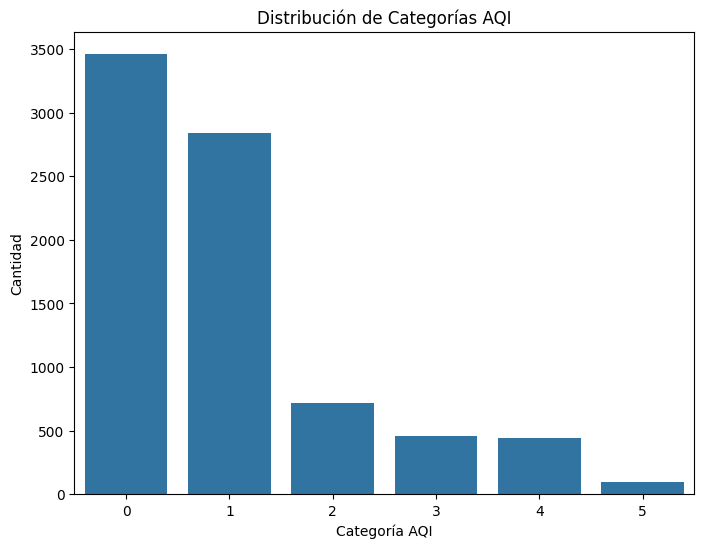

In [ ]:
# Contar la cantidad de datos en cada categoría AQI
aqi_counts = df['AQI_Category'].value_counts()
print(aqi_counts)

# Puedes usar un gráfico de barras para visualizar la distribución de las categorías AQI
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Category', data=df)
plt.title('Distribución de Categorías AQI')
plt.xlabel('Categoría AQI')
plt.ylabel('Cantidad')
plt.show()


*Tal como se observa, las clases están altamente desbalanceadas, por lo que se tiene que realizar un tratamiento a esto*

* Antes de esto, por medio de joblib (método dump) se escalan (normalizan) los datos del dataframe, en una escala del 0 al 1, debido a que algunos modelos funcionan mejor así.

* Realizado por medio de MinMaxScaler, de Scikit-learn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Crear el objeto scaler
scaler = MinMaxScaler()

# Normalizar las características numéricas
df[['PM2.5', 'PM10']] = scaler.fit_transform(df[['PM2.5', 'PM10']])

# Guardar el scaler en un archivo .joblib para usarlo posteriormente
joblib.dump(scaler, 'scaler3.joblib')

# Ver los primeros datos después de la normalización
df.head()

   Time      PM10     PM2.5  AQI_Category
0     1  0.375758  0.419679             4
1     2  0.363636  0.447791             4
2     3  0.357576  0.477912             4
3     4  0.345455  0.491968             4
4     5  0.345455  0.495984             4


#7. Separación de caracrerísticas de prueba y entrenamiento y entrenamiento de modelos

* Por medio de las librerías que proporciona scikit-learn para dividir los datos y crear modelos.

* Además, medición del accuracy (exactitud) de los modelos, para determinar el mejor.

In [ ]:
#Importación de librerías
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Separar las características (X) y la variable objetivo (y)
X = df[['Time', 'PM2.5', 'PM10']]
y = df['AQI_Category']

# Dividir los datos en conjuntos de entrenamiento y prueba (estratificación para clasificar datos en grupos más parecidos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (6408, 3)
Tamaño del conjunto de prueba: (1602, 3)


* Se siguen, principalmente estos pasos:
1. Se declara el modelo (en este caso, nb_model porque es un Naive Bayes multinomial, que funciona por medio de la probabilidad bayesiana).
2. Se ajustan los datos de entrenamiento (X_train y y_train) al modelo
3. Se predicen datos con la sección de prueba del dataframe (conjunto que nunca vio los datos), por medio del método predict().
4.Almacenamiento del modelo con el método .dump() de joblib.

In [ ]:
# Crear el modelo Naive Bayes
nb_model = MultinomialNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)
joblib.dump(nb_model, 'nb_model.joblib')

['nb_model.joblib']

* Luego, se procede a calcular la accuracy (exactitud) del modelo, por medio de la matriz de confusión (en esta, se contemplan los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos)

In [ ]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.49812734082397003
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       692
           1       0.27      0.19      0.22       569
           2       0.00      0.00      0.00       143
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        88
           5       0.00      0.00      0.00        19

    accuracy                           0.50      1602
   macro avg       0.14      0.20      0.16      1602
weighted avg       0.34      0.50      0.39      1602



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC

# Crear el modelo SVC
svc_model = SVC(kernel='linear', random_state=42)  # Puedes experimentar con diferentes kernels

# Entrenar el modelo
svc_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svc_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVC: {accuracy}")

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))
joblib.dump(svc_model, 'svc_model.joblib')


Precisión del modelo SVC: 0.916354556803995
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       692
           1       0.87      0.97      0.92       569
           2       0.90      0.72      0.80       143
           3       0.93      0.87      0.90        91
           4       0.84      0.93      0.88        88
           5       1.00      0.16      0.27        19

    accuracy                           0.92      1602
   macro avg       0.92      0.76      0.79      1602
weighted avg       0.92      0.92      0.91      1602



['svc_model.joblib']

In [ ]:
# prompt: now a knn

from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=50)  # Puedes ajustar el número de vecinos

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy}")

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))
joblib.dump(knn_model, 'knn_model.joblib')

Precisión del modelo KNN: 0.8014981273408239
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       692
           1       0.76      0.93      0.84       569
           2       0.52      0.45      0.48       143
           3       0.37      0.27      0.32        91
           4       0.78      0.40      0.53        88
           5       0.00      0.00      0.00        19

    accuracy                           0.80      1602
   macro avg       0.56      0.49      0.51      1602
weighted avg       0.79      0.80      0.79      1602



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['knn_model.joblib']

In [ ]:
print(y_pred)

[4 0 0 ... 1 1 0]


In [ ]:
# prompt: Entrenar ahora con random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=2, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
  # Puedes ajustar el número de árboles

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy}")

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))
joblib.dump(rf_model, 'rf_model.joblib')


Precisión del modelo Random Forest: 0.9769038701622972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       692
           1       0.99      0.99      0.99       569
           2       0.92      0.96      0.94       143
           3       0.94      0.87      0.90        91
           4       0.87      0.94      0.91        88
           5       1.00      0.42      0.59        19

    accuracy                           0.98      1602
   macro avg       0.95      0.86      0.89      1602
weighted avg       0.98      0.98      0.98      1602



['rf_model.joblib']

* Al ser el de mejor exactitud el Random Forest Clasiffier, se escoje este para predecir.

#8. Validación del funcionamiento del modelo

* Por medio de inputs de usuario simulados (datos que un usuario escogería, al azar, para la prueba) se prueba el output (salida) de predicción del modelo.

* Se realizó para validar, debido a que anteriormente un modelo tenía accuracy del "100%", aunque estaba muy sesgado hacia predecir la categoría 5; solo daba ese valor.

In [ ]:
# prompt: Crea una predicción con knn, simulando datos introducidos por el usuario

# Cargar el scaler
scaler = joblib.load('scaler3.joblib')

# Cargar el codificador de horas
encoded_hour = joblib.load('encoded_hour.joblib')

# Simular datos introducidos por el usuario
user_hour = 10  # Introducido por el usuario
user_pm25 = 370  # Introducido por el usuario
user_pm10 = 200  # Introducido por el usuario

# Preprocesar los datos del usuario
# The previous method was incorrect as it was trying to convert an integer to datetime
# Instead, we need to directly use the integer value for 'Time' as it was used during training
user_data_scaled = scaler.transform([[user_pm25, user_pm10]])
user_data = np.concatenate(([user_hour], user_data_scaled[0]), axis=0).reshape(1, -1)

# Realizar la predicción con el modelo KNN
prediction = knn_model.predict(user_data)

# Interpretar la predicción
aqi_mapping_loaded = load('aqi_mapping_1.joblib')
predicted_aqi_category = list(aqi_mapping_loaded.keys())[list(aqi_mapping_loaded.values()).index(prediction[0])]

print(f"La predicción de la categoría AQI es: {predicted_aqi_category}")


La predicción de la categoría AQI es: No sano en general


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

# Cargar el scaler
scaler = joblib.load('scaler3.joblib')

# Cargar el codificador de horas
encoded_hour = joblib.load('encoded_hour.joblib')

# Simular datos introducidos por el usuario
user_hour = 1  # Introducido por el usuario
user_pm25 = 360  # Introducido por el usuario
user_pm10 = 200  # Introducido por el usuario

# Preprocesar los datos del usuario
user_data_scaled = scaler.transform([[user_pm25, user_pm10]])
user_data = np.concatenate(([user_hour], user_data_scaled[0]), axis=0).reshape(1, -1)

# Realizar la predicción con el modelo SVC
prediction = svc_model.predict(user_data)

# Interpretar la predicción
aqi_mapping_loaded = load('aqi_mapping_1.joblib')
predicted_aqi_category = list(aqi_mapping_loaded.keys())[list(aqi_mapping_loaded.values()).index(prediction[0])]

print(f"La predicción de la categoría AQI con SVC es: {predicted_aqi_category}")


La predicción de la categoría AQI con SVC es: Peligroso


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Cargar el scaler
scaler = joblib.load('scaler3.joblib')

# Cargar el codificador de horas
encoded_hour = joblib.load('encoded_hour.joblib')

# Simular datos introducidos por el usuario
user_hour = 5  # Introducido por el usuario
user_pm25 = 500  # Introducido por el usuario
user_pm10 = 200  # Introducido por el usuario

# Preprocesar los datos del usuario
user_data_scaled = scaler.transform([[user_pm25, user_pm10]])
user_data = np.concatenate(([user_hour], user_data_scaled[0]), axis=0).reshape(1, -1)

# Realizar la predicción con el modelo SVC
prediction = rf_model.predict(user_data)

# Interpretar la predicción
aqi_mapping_loaded = load('aqi_mapping_1.joblib')
predicted_aqi_category = list(aqi_mapping_loaded.keys())[list(aqi_mapping_loaded.values()).index(prediction[0])]

print(f"La predicción de la categoría AQI con SVC es: {predicted_aqi_category}")

La predicción de la categoría AQI con SVC es: Muy poco sano


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Nota: En algún punto se realizó un smote para las clases desbalanceadas. Por razones desconocidas, no se tiene acceso a la celda de código donde se hizo (se crearon datos sintéticos en la separación de características de prueba y entrenamiento, para balancear las clases en AQI_Category)**